# `STARSKØPE`



**Building a Cyberoptic Artificial Telescope for Astrophysical Object Classification**

> Flatiron School Capstone Project
* `Author: Ru Keïn`
* `Instructor: James Irving PhD`
* `Data Science Full-Time Program`
* `Blog post:` http://www.hakkeray.com/datascience/2020/03/22/planetX-hunter-classification-algorithms.html
* `Non-Technical Presentation`: Datascience-CAPSTONE-starskope.pdf

    Note: this project is divided into 3 notebooks:

    starskøpe I : Binary Classification of K2 Timeseries Photometry Data using a Convolutional Neural Network (CNN)
    starskøpe II: Autoencoding Restricted Boltzmann Machines for Image Classification of Raw Spectographs
    starskøpe III: Stacking RBMs into single robust Deep Boltzmann Machine

# Mission Brief

## ABSTRACT

> "Mathematicians [...] are often led astray when 'studying' physics because they lose sight of the physics. 
They say: *'Look, these differential equations--the Maxwell equations--are all there is to electrodynamics; it is admitted by the physicists that there is nothing which is not contained in the equations. The equations are complicated, but after all they are only mathematical equations and if I understand them mathematically inside out, I will understand the physics inside out.'* Only it doesn't work that way. Mathematicians who study physics with that point of view--and there have been many of them--usually make little contribution to physics and, in fact, little to mathematics. They fail because the actual physical situations in the real world are so complicated that it is necessary to have a much broader understanding of the equations."
**-Richard Feynman, *The Feynman Lectures on Physics: Volume 2*, Chapter 2-1: "Differential Calculus of Vector Fields"**

---

**INTRODUCTION**
One of the reasons I quote Mr. Feynman above is because I set out to work on this project with only one year of high school physics under my belt. Despite loving the subject and even getting an A- in that one class, for some reason I did not continue pursuing physics while in school. I bought the Feynman lectures a few years back (on a whim? who does that?) and as soon as I began preparing for this project I felt intuitively that it would be somewhat ridiculous for me to build neural networks for classifying astrophysical data if I didn't fully grasp how and why the equations used to calculate my findings actually work.  

**QUESTIONS**
The specific questions this project seeks to answer are as follows: 

    1. Can a transiting exoplanet be detected strictly by analyzing the raw flux values of a given star? 
    
    2. What is the best approach for pre-processing photometric timeseries data and what are some of the issues we might encounter in choosing how the data is prepared for classification modeling?
    
    3. How much signal-to-noise ratio is too much? That is, if the classes are highly imbalanced, for instance only a few planets can be confirmed out of thousands of stars, does the imbalance make for an unreliable or inaccurate model? 
    4. How do we test and validate that?
  

**DATASET**
To answer the above questions, I started the analysis with a small labeled timeseries dataset from Kaggle posted by NASA several years ago. The reason I chose this particular dataset is because in terms of the type of information we typically need to know in order to solve a physics problem -- the primary one being UNITS, otherwise it's a math problem! -- this one is barren. The author who posted the dataset (`Winter Delta` or `W∆`) does however give us a few hints on how we *could* determine the units, and the dimensions, and a lot of other important physics-related information, if we do a little research. The biggest hint is that this dataset is from the K2 space telescope's Campaign 3 observations in which only 42 confirmed exoplanets are detected in a set of over 5,000 stars. Looking at the dataset on its own (before doing any digging), we are given little information about how long the time period covers, and we know do not know what the time intervals between flux values are. So far, this has not stopped any data scientists from attempting to tackle the classification model without gathering any additional information. 

**MODEL**
To answer the question, I first set out to build a model for the data as is, "sans-physics". The baseline model is a neural network using the Keras API in a sci-kit learn wrapper.  

**RESULTS**
I was able to identify with 99% accuracy the handful of stars (5) in the test dataset that have a confirmed exoplanet in their orbit. 

**CONCLUSION**
This baseline model is mathematically accurate, but it does not "understand physics". The conclusion we need to make about the model is whether or not this lack of physics embedded in the training process (or even pre-training process) is acceptable or not.

While it is possible to create a 99% accurate machine learning model for detecting exoplanets using the raw flux values, without any sense of the actual time intervals, and with a highly imbalanced data set (imbalanced meaning only a few positive examples in a sea of negatives) - it is unclear that we can "get away with" this in every case. Furthermore, it is unlikely that could feel completely sure that we aren't missing out on critical information - such as detecting the existence of an earth-like exoplanet transiting a star - if we don't use our understanding of physics to further de-noise, normalize, and scale the data before training the model (and possibly even embed this into a pre-training phase). As a case in point, if you read any of the space telescope handbooks, you will quickly learn just how complex the instruments that are producng this data are, and that the way their technology works, when and where in the sky they were pointing, as well as what actually happened during their missions, you'd know that should all probably be taken into account in your model! The K2 data in particular, for instance, has a unique issue that every so often its thrusters would fire to adjust/maintain its position in the sky, causing data at multiple points to be completely useless. 

*Why that matters...*
This type of noise cannot be removed without knowing what exact times the thrusters fired, as well as what times each of the observations of the dataset occurred. Even if we do manage to throw the bad data out, we are still stuck with the problem of not having any data for that time period, and once again might miss our potential planet's threshold crossing event! If we know where and when those missing pieces occur, we could use that to collect our missing data from another telescope like TESS, which has overlapping targets of observation. A model that can combine data from two different space telescopes, and be smart enough to know based on the telescope it came from how to handle the data, would make truly accurate predictions, and much more useful classifications. 

*What we can do about that...*
This is the type of model I will set out to build in my future work. This is what we would call a cyberoptic artificial telescope - one that can aggregate large datasets from multiple missions and give us a more accurate, more detailed picture of the stars and planets than what we have available to us in the limited view of a single picture from a single telescope at a single point in time. This is the vision for *STARSKØPE* which will come out of this project.

**RECOMMENDATIONS**
My recommendations are the following:

   1. Use datasets from the MAST website (via API) to incorporate other calculations of the star's properties as features to be used for classification algorithms. Furthermore, attempt other types of transformations and normalizations on the data before running the model - for instance, apply a Fourier transform.

   2. Combine data from multiple campaigns and perhaps even multiple telescopes (for instance, matching sky coordinates and time intervals between K2, Kepler, and TESS for a batch of stars that have overlapping observations - this would be critical for finding transit periods that are longer than the campaigns of a single telecope's observation period).

   3. Explore using computer vision on not only the Full Frame images we can collect from telescopes like TESS, but also on spectographs of the flux values themselves. The beauty of machine learning is our ability to rely on the computer to pick up very small nuances in differences that we ourselves cannot see with our own eyes. 
   
   4. Explore using autoencoded machine learning algorithms with Restricted Boltzmann Machines - this type of model has proven to be incredibly effective in the image analysis of handwriting as we've seen applied the MNIST dataset - let's find out if the same is true for images of stars, be they the Full Frame Images or spectographs.

**FUTURE WORK**
To continue this project, I'll take another approach for detecting exoplanets using computer vision to analyze images of spectographs of this same star flux data set. Please go to the notebook `[starskøpe-2]` to see how I use a Restricted Boltzmann Machines neural network model to classify stars as exoplanet hosts using spectograph images of the flux values to find transiting exoplanets. Following this, I will apply the same algorithm to spectographs of Fourier transformed data, as you will see in `[starskøpe-3]`. 

Additional future work following this project will be to develop my "cyberoptic artificial telescope" as a machine learning driven application that any astrophysicist can use to look at a single or collection of stars and have the model classify them according not only to exoplanet predictions, but also predict what type of star it is, and other key properties that would be of interest for astrophysical science applications.


# Obtain

Begin by importing libraries and code packages for basic analysis, as well as the kaggle dataset.

In [1]:
# fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 
#!pip install fsds_100719
import fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
# Import code packages and libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
 
font_dict={'family':'"Titillium Web", monospace','size':16}
mpl.rc('font',**font_dict)

#ignore pink warnings
import warnings
warnings.filterwarnings('ignore')
# Allow for large # columns
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows','')

In [3]:
# uncomment if you need to install
# !pip install keras
# !pip install tensorflow

In [4]:
# setting a random seed for reproducibility
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

In [5]:
# import additional libraries for keras
import keras
from keras.utils.np_utils import to_categorical

# from keras.preprocessing.text import Tokenizer
from keras import models, layers, optimizers
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, \
BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

Using Theano backend.


In [6]:
# Custom library of helper functions I created called "Spacekit"
import spacekit
from spacekit import analyzer,transformer,builder,computer

Import dataset which has already been split into train and test sets, `exoTrain.csv.zip` and `exoTest.csv.zip` (I compressed them from their original csv format since the training set is > 240 MB so we'll to unzip them).

In [7]:
# SET DIRECTORY PATHS
import os, glob, sys

HOME = os.path.abspath(os.curdir)
DATA = HOME+'/DATA'

In [8]:
# glob puts matching filenames into a list for us - handy for working with multiple datasets
files = glob.glob(DATA+'/*.zip')

In [9]:
os.chdir(DATA)

In [10]:
# Uncomment to unzip 
# !unzip -q '{files[0]}'
# !unzip -q '{files[1]}'

In [11]:
train = pd.read_csv('exoTrain.csv')
test = pd.read_csv('exoTest.csv')

In [12]:
os.chdir(HOME)

# Scrub

**Initial inspection of data, reviewing the features, target (if any), datatypes, and checking for nulls.**

-- What we are NOT going to scrub (in this version at least) --

Each star's light frequency makes up a single row of data collected over the course of the campaign (#3), which in this case for K2 campaign 3 was a little over 60 days (campaigns are normally ~80 days but c3 ended early due to data storage capacity issues. 

If we crunched the numbers (which I did elsewhere), it's 29.4 minutes between each flux measurement, also known as the cadence. This matches the information available in the K2 handbook/MAST website/NASA. Knowing the units and time intervals would allow us to scale and normalize the data very methodically. However, since our initial (math-based) model doesn't 'care' about units, the scrubbing will not take any of the physics into account. This is intentional.

This is something we DO want to come back to for comparison with future models that *will* have the astrophysical properties embedded in their pre-learning process, and in particular the SCRUBBING: remember, this is a *timeseries*...it's hard to do any normalizing, scaling, de-noising to a timeseries if we don't know anything about the time units. And that's only ONE of the dimensions being completely ignored by our strict mathematical approach. The question is, will it matter? 

## Initial Inspection

In [13]:
# Check the value counts 
display(train['LABEL'].value_counts(),test['LABEL'].value_counts())

1    5050
2      37
Name: LABEL, dtype: int64

1    565
2      5
Name: LABEL, dtype: int64

In [14]:
# comparing train and test datasets
display(train.head(), test.head())

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3157,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,-195.99,...,-317.51,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,-24.68,...,-32.14,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,224.02,...,-56.38,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,70.31,...,-32.40,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,-964.35,...,-732.66,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3157,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,-26.06,...,6.49,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,2474.22,...,-216.31,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,67.59,...,-129.34,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,-180.44,...,110.88,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,-1336.24,...,-171.62,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


Our target column `LABEL` assigns each star with a 1 or a 2 to designate whether or not there is a confirmed exoplanet that was found in the star's orbit. This is precisely what we are trying to classify in our model below.

Notice there are a total of only 42 stars that are labeled "2", ie confirmed exoplanet orbiting this star. 
There are 37 exoplanet host stars in the training set, and only 5 in the test set. Such highly imbalanced classes will be something we need to deal with carefully in our model.

## Check Nulls

In [15]:
# check for nulls
print('Train Nulls:',train.isna().sum().value_counts())
print('Test Nulls:',test.isna().sum().value_counts())

Train Nulls: 0    3198
dtype: int64
Test Nulls: 0    3198
dtype: int64


# Explore

## Planet Host vs Non-Host Stars

Since we are setting out to classify stars as being either a planet-host or non-host, it would be useful to compare the data visually and see if we can pick up on any significant differences in the flux values with just our eyeballs. The simplest way to do this is plot the signals of each target class for a couple of stars and look at the scatter plots and a line plots.

### Threshold Crossing Event (TCE)
TCE is determined by a significant dip in the flux values, the assumption being something crossed in front of the star blocking its light for some period of time that the telescope has designated as suspect of an orbiting planet! The occurrence of a TCE means that star is flagged as a 'Target of Interest' or in K2's case, 'Kepler Object of Ineterst' (KOI). The KOIs for each campaign have to be confirmed by a human, of course, usually an astrophysicist, and that is precisely where machine learning comes in - there are billions and billions of stars, and thus billions of billions of potential data points. "Looking for a needle in a haystack" doesn't even work as a metaphor for a scale this immense. This is the ultimate challenge for data scientists! Let's see what this looks like.

In [16]:
# grab first row of observations to create pandas series 

# first row is label = 2 which is a confirmed exoplanet host star
# TCE "Threshold Crossing Event"
tce1 = train.iloc[0, :]
tce2 = train.iloc[1, :]

# last row is label = 1 (no tce meaning no evidence this star hosts a planet)
no_tce1 = train.iloc[-1, :]
no_tce2 = train.iloc[-2, :]

display(tce1.head(),tce2.head(),no_tce1.head(), no_tce2.head())

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

LABEL      2.00
FLUX.1   -38.88
FLUX.2   -33.83
FLUX.3   -58.54
FLUX.4   -40.09
Name: 1, dtype: float64

LABEL       1.00
FLUX.1    323.28
FLUX.2    306.36
FLUX.3    293.16
FLUX.4    287.67
Name: 5086, dtype: float64

LABEL     1.00
FLUX.1    3.82
FLUX.2    2.09
FLUX.3   -3.29
FLUX.4   -2.88
Name: 5085, dtype: float64

# A Word on Units..

After doing a little research (mostly by reading the K2 Handbook and visiting the MAST website where NASA houses all of its space telescope data) we learn that the flux values for campaign 3 that are in the Kaggle dataset have been put through a de-noising process. Prior to this particular de-noising process, the flux values would be called `SAP Flux` however in this case we are dealing with `PDC_SAP Flux`. At the moment the units may not seem to matter much, since we assume they are consist across all observations. However, as with anything relating to physics, and science for that matter, the units MATTER. All that to say, for now we are at least going to label the axes accurately so that later down the line if we want to compare this dataset to another from the archive, we will know the units! :)

In [17]:
# View what this function is doing here:
# atomic_vector_plotter(): 

# def atomic_vector_plotter(signal, label_col=None, classes=None, class_names=None, figsize=(15,5), 
#     y_units=None, x_units=None):
#         """
#         Plots scatter and line plots of time series signal values.  
        
#         **ARGS
#         signal: pandas series or numpy array
#         label_col: name of the label column if using labeled pandas series
#             -use default None for numpy array or unlabeled series.
#             -this is simply for customizing plot Title to include classification    
#         classes: (optional- req labeled data) tuple if binary, array if multiclass
#         class_names: tuple or array of strings denoting what the classes mean
#         figsize: size of the figures (default = (15,5))
        
#         ******
        
#         Ex1: Labeled timeseries passing 1st row of pandas dataframe
#         > first create the signal:
#         star_signal_alpha = x_train.iloc[0, :]
#         > then plot:
#         star_signals(star_signal_alpha, label_col='LABEL',classes=[1,2], 
#                     class_names=['No Planet', 'Planet']), figsize=(15,5))
        
#         Ex2: numpy array without any labels
#         > first create the signal:
        
#         >then plot:
#         star_signals(signal, figsize=(15,5))
        
#         ######
#         TODO: 
#         -`signal` should take an array rather than pdseries
#         -could allow either array or series to be passed, conv to array if series 
#         ######
#         """
        
#         # pass None to label_col if unlabeled data, creates generic title
#         if label_col is None:
#             label = None
#             title_scatter = "Scatterplot of Star Flux Signals"
#             title_line = "Line Plot of Star Flux Signals"
#             color='black'
            
#         # store target column as variable 
#         elif label_col is not None:
#             label = signal[label_col]
#             # for labeled timeseries
#             if label == 1:
#                 cn = class_names[0]
#                 color='red'

#             elif label == 2:
#                 cn = class_names[1] 
#                 color='blue'
#         #create appropriate title acc to class_names    
#             title_scatter = f"Scatterplot for Star Flux Signal: {cn}"
#             title_line = f"Line Plot for Star Flux Signal: {cn}"
        
#         # Set x and y axis labels according to units
#         # if the units are unknown, we will default to "Flux"
#         if y_units == None:
#             y_units = 'Flux'
#         else:
#             y_units = y_units
#         # it is assumed this is a timeseries, default to "time"   
#         if x_units == None:
#             x_units = 'Time'
#         else:
#             x_units = x_units
        
#         # Scatter Plot 
        
#         plt.figure(figsize=figsize)
#         plt.scatter(pd.Series([i for i in range(1, len(signal))]), 
#                     signal[1:], marker=4, color=color)
#         plt.ylabel(y_units)
#         plt.xlabel(x_units)
#         plt.title(title_scatter)
#         plt.show()

#         # Line Plot
#         plt.figure(figsize=figsize)
#         plt.plot(pd.Series([i for i in range(1, len(signal))]), 
#                 signal[1:], color=color)
#         plt.ylabel(y_units)
#         plt.xlabel(x_units)
#         plt.title(title_line)
#         plt.show()

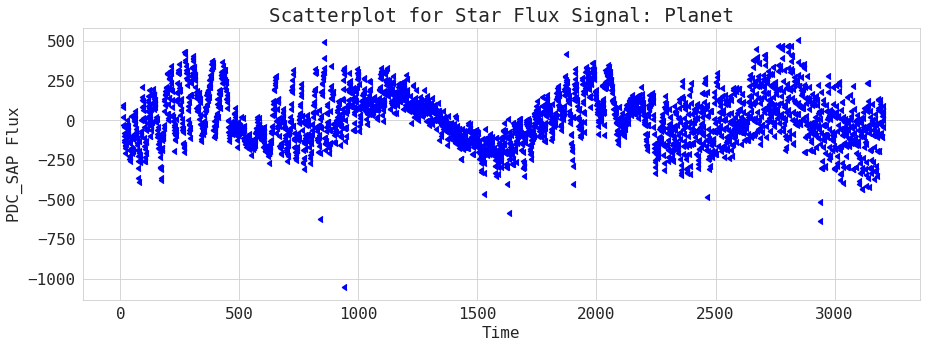

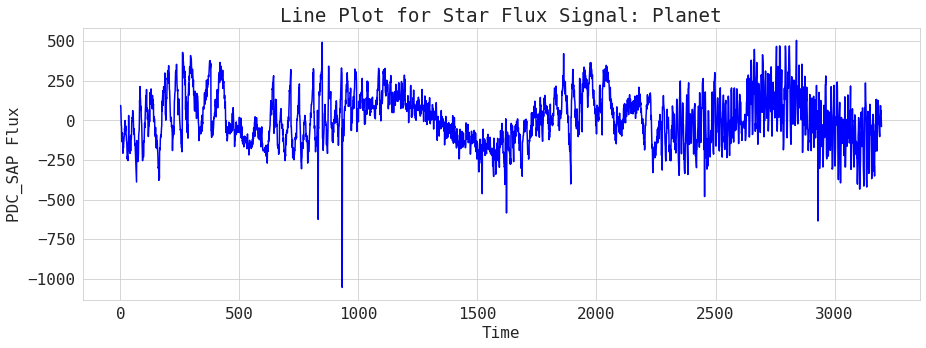

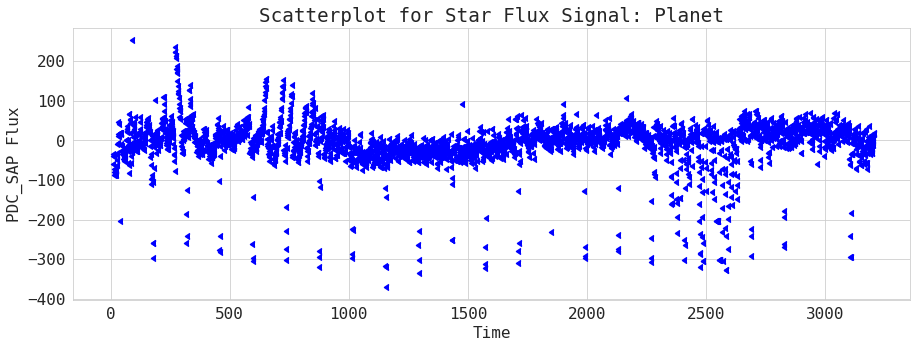

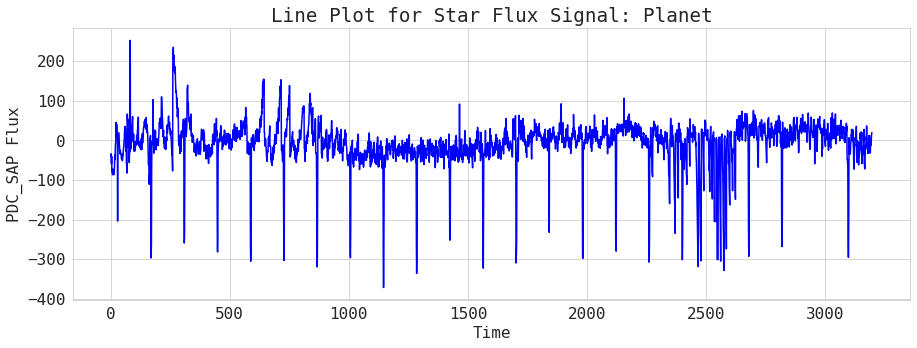

In [18]:
from spacekit.analyzer import Flux

Flux.atomic_vector_plotter(signal=tce1, label_col='LABEL', classes=[1,2], 
         class_names=['No Planet', 'Planet'], 
         y_units='PDC_SAP Flux', x_units='Time')

Flux.atomic_vector_plotter(signal=tce2, label_col='LABEL', classes=[1,2],
         class_names=['No Planet', 'Planet'],
         y_units='PDC_SAP Flux', x_units='Time') 

This second star's flux signal pattern looks very different - are we to assume that each one of those dips is a transit event? Perhaps more than one planet is orbiting? Otherwise that would be a fairly short period. Let's compare these to the NON planet host stars:

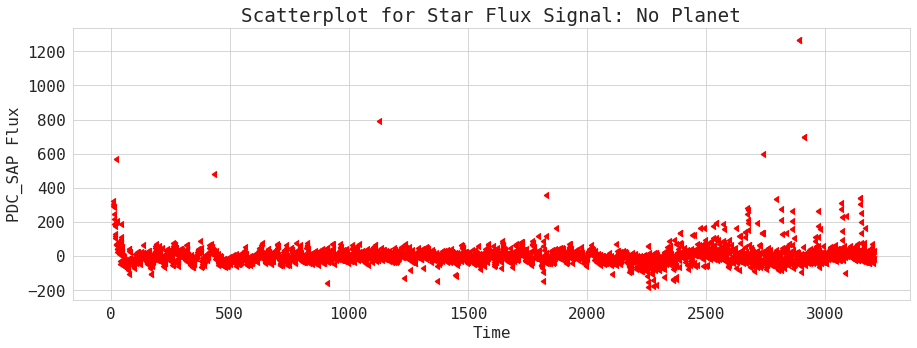

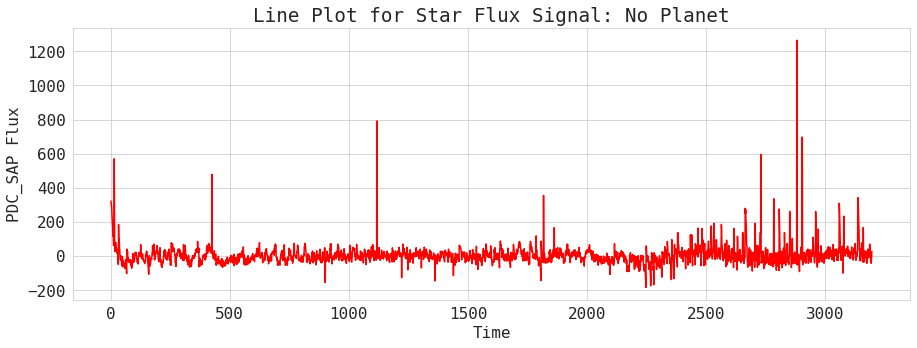

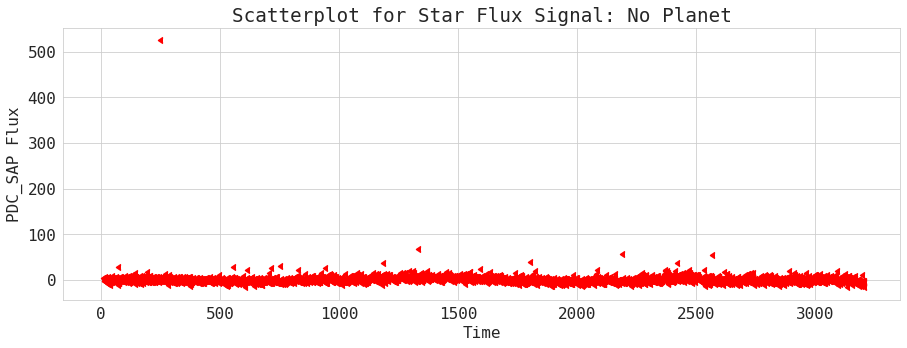

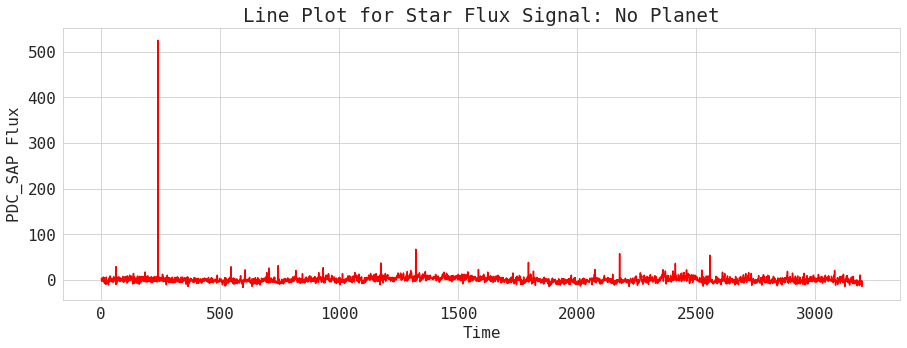

In [19]:
Flux.atomic_vector_plotter(signal=no_tce1, label_col='LABEL', classes=[1,2],
                         class_names=['No Planet', 'Planet'],
                          y_units='PDC_SAP Flux', x_units='Time')

Flux.atomic_vector_plotter(signal=no_tce2, label_col='LABEL', classes=[1,2],
                         class_names=['No Planet', 'Planet'],
                          y_units='PDC_SAP Flux', x_units='Time') 

It's hard to make a fair comparison with these plots without being able to see much in detail. We need to "zoom in" - this can be accomplished through normalizing and scaling techniques, but the standard procedure for this type of data would be to perform phase-folding based on the estimated period of the transiting planets.

## Pre-processing

In [20]:
from spacekit.transformer import Transformer
T = transformer.Transformer()

In [21]:
X_train,X_test,y_train,y_test = T.hypersonic_pliers(DATA+'/exoTrain.csv', 
                                          DATA+'/exoTest.csv') 

X_train:  (5087, 3197)
y_train:  (5087, 1)
X_test:  (570, 3197)
y_test:  (570, 1)


In [22]:
# View what this function is doing here:
# hypersonic_pliers()

# def hypersonic_pliers(path_to_train, path_to_test):
        
#         """
#         Using Numpy to extract data into 1-dimensional arrays
#         separate target classes (y) for training and test data
#         assumes y (target) is first column in dataframe
        
#         #TODO: option to pass in column index loc for `y` if not default (0) 
#         #TODO: option for `y` to already be 0 or 1 (don't subtract 1)
#         #TODO: allow option for `y` to be categorical (convert via binarizer)
#         """
#         import numpy as np
        
#         Train = np.loadtxt(path_to_train, skiprows=1, delimiter=',')
#         X_train = Train[:, 1:]
#         y_train = Train[:, 0, np.newaxis] - 1.
        
#         Test = np.loadtxt(path_to_test, skiprows=1, delimiter=',')
#         X_test = Test[:, 1:]
#         y_test = Test[:, 0, np.newaxis] - 1.
        
#         del Train,Test
#         print("X_train: ", X_train.shape)
#         print("y_train: ", y_train.shape)
#         print("X_test: ", X_test.shape)
#         print("y_test: ", y_test.shape)
        
#         return X_train, X_test, y_train, y_test

## Scaling

Scale each observation to zero mean and unit variance.

In [23]:
# Scale each row to zero mean and unit variance.
X_train, X_test = T.thermo_fusion_chisel(X_train, X_test)

Mean:  0.0
Variance:  1.0
Mean:  2.6670356049800446e-17
Variance:  1.0


In [24]:
# View what this function is doing here:
# thermo_fusion_chisel()

# def thermo_fusion_chisel(matrix1, matrix2=None):
#             """
#             Scales each array of a matrix to zero mean and unit variance.
#             returns matrix/matrices of same shape as input but scaled
#             matrix2 is optional - useful if data was already train-test split
#             example: matrix1=X_train, matrix2=X_test
            
#             """
#             import numpy as np
            
                
#             matrix1 = ((matrix1 - np.mean(matrix1, axis=1).reshape(-1,1)) / 
#                 np.std(matrix1, axis=1).reshape(-1,1))
            
#             print("Mean: ",matrix1[0].mean())
#             print("Variance: ",matrix1[0].std())
            
#             if matrix2 is not None:
#                 matrix2 = ((matrix2 - np.mean(matrix2, axis=1).reshape(-1,1)) / 
#                     np.std(matrix2, axis=1).reshape(-1,1))
            
#                 print("Mean: ",matrix2[0].mean())
#                 print("Variance: ",matrix2[0].std())
#                 return matrix1,matrix2
#             else:
#                 return matrix1

## De-noising

In order to reduce the amount of high frequency noise that is likely to have an adverse effect on the neural network's learning outcomes, we can pass a uniform 1-D filter on our scaled train and test data then stack the arrays along the second axis. There are other techniques we might want to apply for further de-noising but for now we'll start with this for the baseline.

In [25]:
print(X_train.shape)
print(y_train.shape)

(5087, 3197)
(5087, 1)


In [26]:
# we now have a 2-dimensional array for every star
X_train, X_test = T.babel_fish_dispenser(X_train, X_test, step_size=200, 
                                         axis=2)

(5087, 3197, 2) (570, 3197, 2)


In [27]:
# View what this function is doing here:
# babel_fish_dispenser()

# def babel_fish_dispenser(matrix1, matrix2=None, step_size=None, axis=2):
#         """        
#         Adds an input corresponding to the running average over a set number
#         of time steps. This helps the neural network to ignore high frequency 
#         noise by passing in a uniform 1-D filter and stacking the arrays. 

#         **ARGS
#         step_size: integer, # timesteps for 1D filter. defaults to 200
#         axis: which axis to stack the arrays

#         ex:
#         noise_filter(matrix1=X_train, matrix2=X_test, step_size=200)
#         """
#         import numpy as np
#         from scipy.ndimage.filters import uniform_filter1d

#         if step_size is None:
#             step_size=200

#         # calc input for flux signal rolling avgs 
#         filter1 = uniform_filter1d(matrix1, axis=1, size=step_size)
#         # store in array and stack on 2nd axis for each obs of X data
#         matrix1 = np.stack([matrix1, filter1], axis=2)

#         if matrix2 is not None:
#             filter2 = uniform_filter1d(matrix2, axis=1, size=step_size)
#             matrix2 = np.stack([matrix2, filter2], axis=2)
#             print(matrix1.shape,matrix2.shape)
#             return matrix1,matrix2
#         else:
#             print(matrix1.shape)
#             return matrix1


x_train[-1] flux signal rolling avgs

[-0.10910981 -0.10801068 -0.10926314 ... -0.18190533 -0.19232921
 -0.21176035]


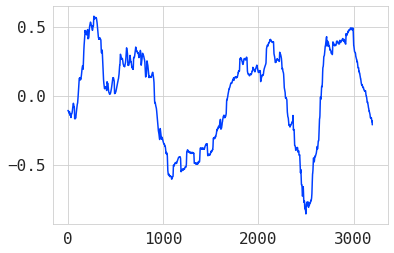

In [28]:
# array on 2nd axis
print('\nx_train[-1] flux signal rolling avgs\n')
# plot arrays
rolling = X_train[1][:,1]
print(rolling)
plt.plot(rolling)

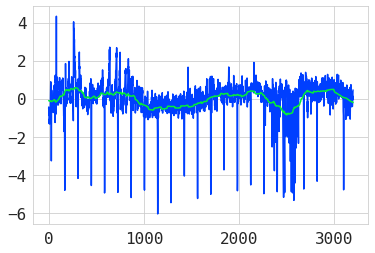

In [29]:
# viewed together...
plt.plot(X_train[1][:,0])
plt.plot(rolling)

# Model

## Build Model

### **Tactical Decisions**

Since I'm building the baseline model from scratch, a few considerations need to be made. While we can run a gridsearch (or randomizedsearchCV) to get the parameters for us, we still need to decide what type of model would be most ideal for this dataset, knowing what we know so far based on the work done so far. From there, we can go with best practices, assess the initial outcomes, and tune the hyperparameters with each iteration. 

**CNN**
The baseline will consist of a one-dimensional convolutional neural network (CNN). This is ideal for working with this particular dataset in which we will pass one row of the timeseries flux values as an array. This is very similar to how we would process image data (and that's strategically useful if we want to develop the model in the future to handle Full-Frame Images from Tess, for instance, or spectographs of the flux frequences, for instance. 

**1-Layer at a time**
We'll be using the Keras API which makes it easy to add in the layers one at a time. Each 1D convolutional layer corresponds to a local filter, and then a pooling layer reduces the data length by approximately a factor 4. At the end, there are two dense layers. Again, this is similar to the approach taken for a typical image classifier. 

**Activation Function**
The RELU activation function is closest to how real neurons actually work and often produces the best results compared to the other options, so we'll at least start with this for the baseline.

**Batch Normalization**
Finally, the batch normalization layers are what help to speed up convergence. 

# `Model 1`

We'll begin creating a baseline model with a lower than usual learning rate and then speed things up and fine-tune parameters for optimization in the next iterations. (The lower learning rate will help to ensure convergence.) 

We'll increase the learning rate in Model2 iteration and also tune any other parameters as necessary. The first iteration uses the Adam optimizer, however, SGD is also a good option we could try here.

In [30]:
X_train.shape

(5087, 3197, 2)

In [31]:
y_train.shape

(5087, 1)

## Train Model

In [32]:
from spacekit.builder import Keras
K = builder.Keras()

In [33]:
m1 = K.build_cnn(X_train, X_test, y_train, y_test, kernel_size=11, 
                     activation='relu', input_shape=X_train.shape[1:], 
                     strides=4, optimizer=Adam, learning_rate=1e-5, 
                     loss='binary_crossentropy', metrics=['accuracy'])

BUILDING MODEL...
LAYER 1
LAYER 2
LAYER 3
LAYER 4
FULL CONNECTION
ADDING COST FUNCTION
COMPILED


In [34]:
# View what this function is doing here:
# build_cnn()

# def build_cnn(X_train, X_test, y_train, y_test, kernel_size=None, 
#               activation=None, input_shape=None, strides=None, 
#               optimizer=Adam, learning_rate=None, loss=None, metrics=None):
#     """
#     Builds, compiles and fits a linear CNN using Keras API

#     """
#     import keras
#     from keras.utils.np_utils import to_categorical
#     # from keras.preprocessing.text import Tokenizer
#     from keras import models, layers, optimizers
#     from keras.models import Sequential, Model
#     from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, \
#     BatchNormalization, Input, concatenate, Activation
#     from keras.optimizers import Adam
#     from keras.wrappers.scikit_learn import KerasClassifier
#     from sklearn.model_selection import cross_val_score

#     if input_shape is None:
#         input_shape = X_train.shape[1:]
#     if kernel_size is None:
#         kernel_size=11
#     if activation is None:
#         activation='relu'
#     if strides is None:
#         strides = 4
#     if learning_rate is None:
#         learning_rate = 1e-5
#     if loss is None:
#         loss='binary_crossentropy'
#     if metrics is None:
#         metrics=['accuracy']

#     print("BUILDING MODEL...")
#     model=Sequential()

#     print("LAYER 1")
#     model.add(Conv1D(filters=8, kernel_size=kernel_size, 
#                     activation=activation, input_shape=input_shape))
#     model.add(MaxPool1D(strides=strides))
#     model.add(BatchNormalization())

#     print("LAYER 2")
#     model.add(Conv1D(filters=16, kernel_size=kernel_size, 
#                     activation=activation))
#     model.add(MaxPool1D(strides=strides))
#     model.add(BatchNormalization())

#     print("LAYER 3")
#     model.add(Conv1D(filters=32, kernel_size=kernel_size, 
#                     activation=activation))
#     model.add(MaxPool1D(strides=strides))
#     model.add(BatchNormalization())

#     print("LAYER 4")
#     model.add(Conv1D(filters=64, kernel_size=kernel_size, 
#                     activation=activation))
#     model.add(MaxPool1D(strides=strides))
#     model.add(Flatten())

#     print("FULL CONNECTION")
#     model.add(Dropout(0.5))
#     model.add(Dense(64, activation=activation))
#     model.add(Dropout(0.25))
#     model.add(Dense(64, activation=activation))

#     print("ADDING COST FUNCTION")
#     model.add(Dense(1, activation='sigmoid'))

#     ##### COMPILE #####
#     model.compile(optimizer=optimizer(learning_rate), loss=loss, 
#                 metrics=metrics)
#     print("COMPILED")  

#     return model 

## Batch Generator

To correct for the extremely unbalanced dataset, we'll ensure that the network sees 50% of the positive sample over each batch. We will also apply augmentation by rotating each of the samples randomly each time, thus generating new data. This is similar to image classification when we rotate or shift the samples each time.

In [35]:
h1 = K.fit_cnn(X_train,y_train, X_test, y_test, m1,
               validation_data=(X_test, y_test), verbose=2, epochs=5, 
               steps_per_epoch=(X_train.shape[1]//32), batch_size=32)

FITTING MODEL...
Epoch 1/5
 - 18s - loss: 0.7967 - accuracy: 0.5009 - val_loss: 0.6152 - val_accuracy: 0.9351
Epoch 2/5
 - 17s - loss: 0.7547 - accuracy: 0.5098 - val_loss: 0.6105 - val_accuracy: 0.8509
Epoch 3/5
 - 18s - loss: 0.7194 - accuracy: 0.5363 - val_loss: 0.6260 - val_accuracy: 0.7351
Epoch 4/5
 - 17s - loss: 0.7406 - accuracy: 0.5107 - val_loss: 0.6455 - val_accuracy: 0.6509
Epoch 5/5
 - 18s - loss: 0.7250 - accuracy: 0.5183 - val_loss: 0.6552 - val_accuracy: 0.6193
TRAINING COMPLETE
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3187, 8)           184       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 797, 8)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 797, 8)            32        
________________

In [36]:
# View what this function is doing here:
# fit_cnn()

# def fit_cnn(X_train,y_train, X_test, y_test, model, validation_data=None, 
#                 verbose=None, epochs=None, steps_per_epoch=None, batch_size=None):
        
#         if verbose is None:
#             verbose=2
#         if epochs is None:
#             epochs = 5
#         if validation_data is None:
#             validation_data=(X_test, y_test)
#         if steps_per_epoch is None:
#             steps_per_epoch = (X_train.shape[1]//batch_size)
#         if batch_size is None:
#             batch_size = 32

#         print("FITTING MODEL...")
        
#         def batch_maker(X_train, y_train, batch_size=batch_size):
#                 """
#                 Gives equal number of positive and negative samples rotating randomly                
#                 The output of the generator must be either
#                 - a tuple `(inputs, targets)`
#                 - a tuple `(inputs, targets, sample_weights)`.

#                 This tuple (a single output of the generator) makes a single
#                 batch. Therefore, all arrays in this tuple must have the same
#                 length (equal to the size of this batch). Different batches may have 
#                 different sizes. 

#                 For example, the last batch of the epoch is commonly smaller than the others, 
#                 if the size of the dataset is not divisible by the batch size.
#                 The generator is expected to loop over its data indefinitely. 
#                 An epoch finishes when `steps_per_epoch` batches have been seen by the model.
                
#                 """
#                 import numpy
#                 import random
#                 # hb: half-batch
#                 hb = batch_size // 2
                
#                 # Returns a new array of given shape and type, without initializing.
#                 # x_train.shape = (5087, 3197, 2)
#                 xb = np.empty((batch_size, X_train.shape[1], X_train.shape[2]), dtype='float32')
                
#                 #y_train.shape = (5087, 1)
#                 yb = np.empty((batch_size, y_train.shape[1]), dtype='float32')
                
#                 pos = np.where(y_train[:,0] == 1.)[0]
#                 neg = np.where(y_train[:,0] == 0.)[0]

#                 # rotating each of the samples randomly
#                 while True:
#                     np.random.shuffle(pos)
#                     np.random.shuffle(neg)
                
#                     xb[:hb] = X_train[pos[:hb]]
#                     xb[hb:] = X_train[neg[hb:batch_size]]
#                     yb[:hb] = y_train[pos[:hb]]
#                     yb[hb:] = y_train[neg[hb:batch_size]]
                
#                     for i in range(batch_size):
#                         size = np.random.randint(xb.shape[1])
#                         xb[i] = np.roll(xb[i], size, axis=0)
                
#                     yield xb, yb
        
#         history = model.fit_generator(batch_maker(X_train, y_train, batch_size),
#                                         validation_data=validation_data, 
#                                         verbose=verbose, epochs=epochs, 
#                                         steps_per_epoch=steps_per_epoch)
#         print("TRAINING COMPLETE")
#         model.summary()

#         return history

## Evaluate (M1)

Let's assess the model thus far before tuning parameters. We'll create a few helper functions for calculating metrics and analyzing results visually. 

## Class Predictions



In [37]:
y_true, y_pred = computer.get_preds(X_test,y_test, model=m1,verbose=True)

y_pred:
 0    354
1    216
dtype: int64




In [38]:
# View function: get_preds()

# def get_preds(X,y,model=None,verbose=False):
#     if model is None:
#         model=model
#     # class predictions 
#     y_true = y.flatten()
    
#     y_pred = model.predict_classes(X).flatten() 
#     preds = pd.Series(y_pred).value_counts(normalize=False)
    
#     if verbose:
#         print(f"y_pred:\n {preds}")
#         print("\n")

#     return y_true, y_pred

### Rate of False Negatives and Positives (Training)

In [39]:
computer.fnfp(X_train, y_train, m1, training=True)

FN Rate (Training): 0.2556%
FP Rate (Training): 39.3945%


### Rate of False Negatives and Positives (Test)

In [40]:
computer.fnfp(X_test, y_test, m1)

FN Rate (Test): 0.5263%
FP Rate (Test): 37.5439%


In [41]:
# view function: fnfp()

# def fnfp(X,y,model, training=False):

#     import numpy as np

#     y_pred = np.round( model.predict(X) )

#     pos_idx = y==1
#     neg_idx = y==0

#     #tp = np.sum(y_pred[pos_idx]==1)/y_pred.shape[0]
#     fn = np.sum(y_pred[pos_idx]==0)/y_pred.shape[0]

#     #tn = np.sum(y_pred[neg_idx]==0)/y_pred.shape[0]
#     fp = np.sum(y_pred[neg_idx]==1)/y_pred.shape[0]

#     if training:
#         print(f"FN Rate (Training): {round(fn*100,4)}%")
#         print(f"FP Rate (Training): {round(fp*100,4)}%")
#     else:
#         print(f"FN Rate (Test): {round(fn*100,4)}%")
#         print(f"FP Rate (Test): {round(fp*100,4)}%")

### Classification Report

Sci-kit learn has a nice built-in method for evaluating our model:

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score

report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.62      0.76       565
         1.0       0.01      0.40      0.02         5

    accuracy                           0.62       570
   macro avg       0.50      0.51      0.39       570
weighted avg       0.98      0.62      0.76       570



#### Fowlkes-Mallows

Fowlkes-Mallows is a good metric for imbalanced datasets, along with Jaccard which is similar to F1.

In [43]:
sklearn.metrics.fowlkes_mallows_score(y_true,y_pred)

0.7207089012303081

### Interpret Scores
With only 5 epochs, the model performed high in precision. However, because this such an imbalanced dataset, recall and F1 score are more critical metrics and these could definitely be improved. We'll tune some of the hyperparameters, specifically adjusting the learning rate and increasing the number of epochs up to 40. 

### History Metrics

The baseline model is not meant to give us optimal results - the real test will be in our final model below. First let's take a look at some of the visuals to understand what the scores really mean. This will help us decide how to proceed in tuning the model appropriately.

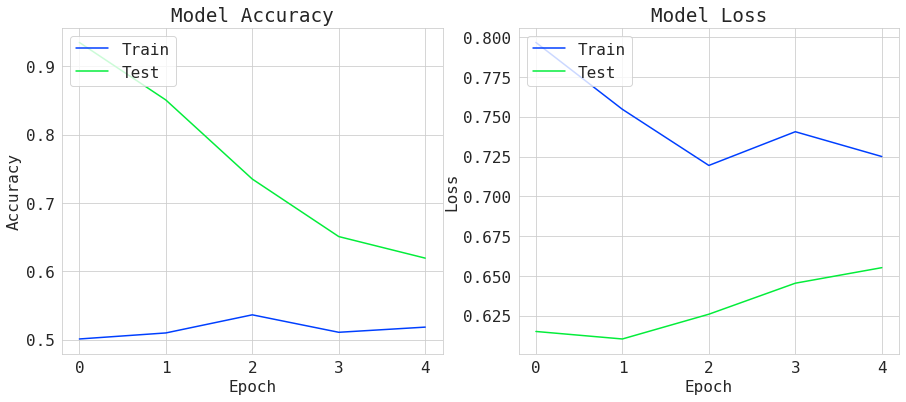

In [44]:
computer.keras_history(h1)

In [45]:
# view function: keras_history()

# def keras_history(history, figsize=(10,4)):
#     """
#     side by side sublots of training val accuracy and loss (left and right respectively)
#     """
    
#     import matplotlib.pyplot as plt
    
#     fig,axes=plt.subplots(ncols=2,figsize=(15,6))
#     axes = axes.flatten()

#     ax = axes[0]
#     ax.plot(history.history['accuracy'])
#     ax.plot(history.history['val_accuracy'])
#     ax.set_title('Model Accuracy')
#     ax.set_ylabel('Accuracy')
#     ax.set_xlabel('Epoch')
#     ax.legend(['Train', 'Test'], loc='upper left')

#     ax = axes[1]
#     ax.plot(history.history['loss'])
#     ax.plot(history.history['val_loss'])
#     ax.set_title('Model Loss')
#     ax.set_ylabel('Loss')
#     ax.set_xlabel('Epoch')
#     ax.legend(['Train', 'Test'], loc='upper left')
#     plt.show()

With only a few epochs, and a small learning rate, it's obvious that our training parameters have a great deal of room for improvement. This is good - we will definitely need to adjust the learning rate. If that doesn't go far enough in producing desired results, we can also try using a different optimizer such as SGD instead of Adam. For now let's look at a few other key metrics.

## Fusion Matrix

It's like a confusion matrix, without the confusion...

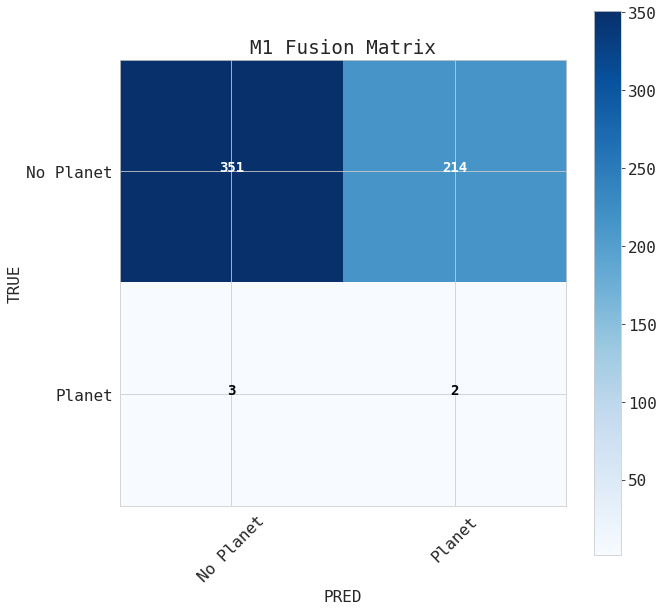

In [46]:
m1_fusion = computer.fusion_matrix(matrix=(y_true,y_pred), 
                          classes=['No Planet','Planet'], 
                                   title='M1 Fusion Matrix')

In [47]:
# view function: fusion_matrix()

# def fusion_matrix(matrix, classes=None, normalize=False, title='Fusion Matrix', cmap='Blues',
#     print_raw=False): 
#     """
#     FUSION MATRIX!
#     -------------
#     It's like a confusion matrix...without the confusion.
    
#     matrix: can pass in matrix or a tuple (ytrue,ypred) to create on the fly 
#     classes: class names for target variables
#     """
#     from sklearn import metrics                       
#     from sklearn.metrics import confusion_matrix #ugh
#     import itertools
#     import numpy as np
#     import matplotlib as mpl
#     import matplotlib.pyplot as plt
    
#     # make matrix if tuple passed to matrix:
#     if isinstance(matrix, tuple):
#         y_true = matrix[0].copy()
#         y_pred = matrix[1].copy()
        
#         if y_true.ndim>1:
#             y_true = y_true.argmax(axis=1)
#         if y_pred.ndim>1:
#             y_pred = y_pred.argmax(axis=1)
#         fusion = metrics.confusion_matrix(y_true, y_pred)
#     else:
#         fusion = matrix
    
#     # INTEGER LABELS
#     if classes is None:
#         classes=list(range(len(matrix)))

#     #NORMALIZING
#     # Check if normalize is set to True
#     # If so, normalize the raw fusion matrix before visualizing
#     if normalize:
#         fusion = fusion.astype('float') / fusion.sum(axis=1)[:, np.newaxis]
#         fmt='.2f'
#     else:
#         fmt='d'
    
#     # PLOT
#     fig, ax = plt.subplots(figsize=(10,10))
#     plt.imshow(fusion, cmap=cmap, aspect='equal')
    
#     # Add title and axis labels 
#     plt.title(title) 
#     plt.ylabel('TRUE') 
#     plt.xlabel('PRED')
    
#     # Add appropriate axis scales
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
#     #ax.set_ylim(len(fusion), -.5,.5) ## <-- This was messing up the plots!
    
#     # Text formatting
#     fmt = '.2f' if normalize else 'd'
#     # Add labels to each cell
#     thresh = fusion.max() / 2.
#     # iterate thru matrix and append labels  
#     for i, j in itertools.product(range(fusion.shape[0]), range(fusion.shape[1])):
#         plt.text(j, i, format(fusion[i, j], fmt),
#                 horizontalalignment='center',
#                 color='white' if fusion[i, j] > thresh else 'black',
#                 size=14, weight='bold')
    
#     # Add a legend
#     plt.colorbar()
#     plt.show() 
#     return fusion, fig

The baseline model only managed to correctly identify 2 planets in the test set, while missing the other 3. The model incorrectly classified 215 non-TCEs as planets. 

## ROC AUC

Plot the ROC area under the curve

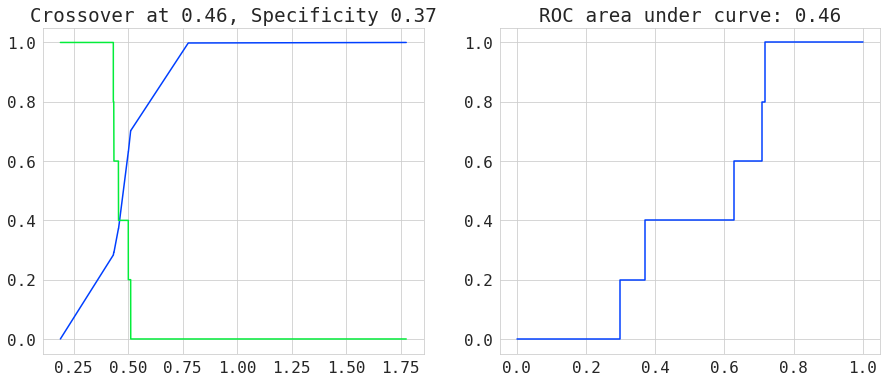

In [48]:
m1_roc = computer.roc_plots(X_test, y_test, m1)

In [49]:
# view function: roc_plots()


# def roc_plots(X,y,model):
#     from sklearn import metrics
#     from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

#     y_true = y.flatten()
#     y_hat = model.predict(X)

#     fpr, tpr, thresholds = roc_curve(y_true, y_hat) 

#     # Threshold Cutoff for predictions
#     crossover_index = np.min(np.where(1.-fpr <= tpr))
#     crossover_cutoff = thresholds[crossover_index]
#     crossover_specificity = 1.-fpr[crossover_index]

#     fig,axes=plt.subplots(ncols=2, figsize=(15,6))
#     axes = axes.flatten()

#     ax=axes[0]
#     ax.plot(thresholds, 1.-fpr)
#     ax.plot(thresholds, tpr)
#     ax.set_title("Crossover at {0:.2f}, Specificity {1:.2f}".format(crossover_cutoff, crossover_specificity))

#     ax=axes[1]
#     ax.plot(fpr, tpr)
#     ax.set_title("ROC area under curve: {0:.2f}".format(roc_auc_score(y_true, y_hat)))
#     plt.show()
    
#     roc = roc_auc_score(y_true,y_hat)

#     return roc

# `Model 2`

Initial parameter tuning: increase learning rate to 3e-4 (0.0003), and increase epochs to 20. 

## Build M2

In [51]:
#### MODEL 2 
# adjust learning rate to 3e-4

m2 = K.build_cnn(X_train, X_test, y_train, y_test, kernel_size=11, 
                     activation='relu', input_shape=X_train.shape[1:], 
                     strides=4, optimizer=Adam, learning_rate=3e-4, 
                     loss='binary_crossentropy', metrics=['accuracy'])

BUILDING MODEL...
LAYER 1
LAYER 2
LAYER 3
LAYER 4
FULL CONNECTION
ADDING COST FUNCTION
COMPILED


## Fit M2

In [52]:
# increase number of epochs to 20

h2 = K.fit_cnn(X_train,y_train, X_test, y_test, m2,
               validation_data=(X_test, y_test), verbose=2, epochs=20, 
               steps_per_epoch=(X_train.shape[1]//32), batch_size=32)

FITTING MODEL...
Epoch 1/20
 - 18s - loss: 0.6963 - accuracy: 0.5792 - val_loss: 0.8951 - val_accuracy: 0.0281
Epoch 2/20
 - 17s - loss: 0.6170 - accuracy: 0.6686 - val_loss: 0.7812 - val_accuracy: 0.3754
Epoch 3/20
 - 18s - loss: 0.5714 - accuracy: 0.7109 - val_loss: 0.5495 - val_accuracy: 0.7912
Epoch 4/20
 - 19s - loss: 0.5186 - accuracy: 0.7468 - val_loss: 0.4270 - val_accuracy: 0.8526
Epoch 5/20
 - 18s - loss: 0.4791 - accuracy: 0.7749 - val_loss: 0.5623 - val_accuracy: 0.7158
Epoch 6/20
 - 21s - loss: 0.4463 - accuracy: 0.8024 - val_loss: 0.4600 - val_accuracy: 0.7754
Epoch 7/20
 - 17s - loss: 0.4060 - accuracy: 0.8210 - val_loss: 0.4943 - val_accuracy: 0.7474
Epoch 8/20
 - 18s - loss: 0.3578 - accuracy: 0.8406 - val_loss: 0.8106 - val_accuracy: 0.5825
Epoch 9/20
 - 17s - loss: 0.3021 - accuracy: 0.8741 - val_loss: 0.5053 - val_accuracy: 0.7351
Epoch 10/20
 - 17s - loss: 0.2565 - accuracy: 0.9003 - val_loss: 1.1649 - val_accuracy: 0.5018
Epoch 11/20
 - 17s - loss: 0.2251 - accura

## Evaluate M2

The `compute` function combines all the functions used above for calculating the metrics into one shot:

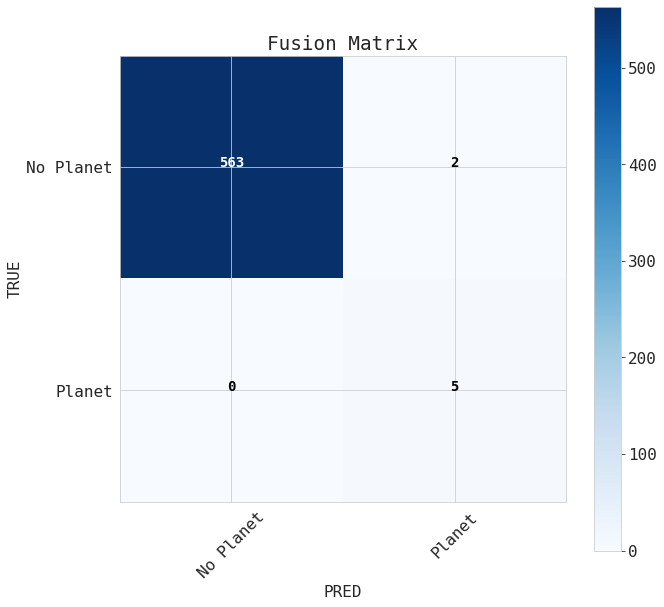

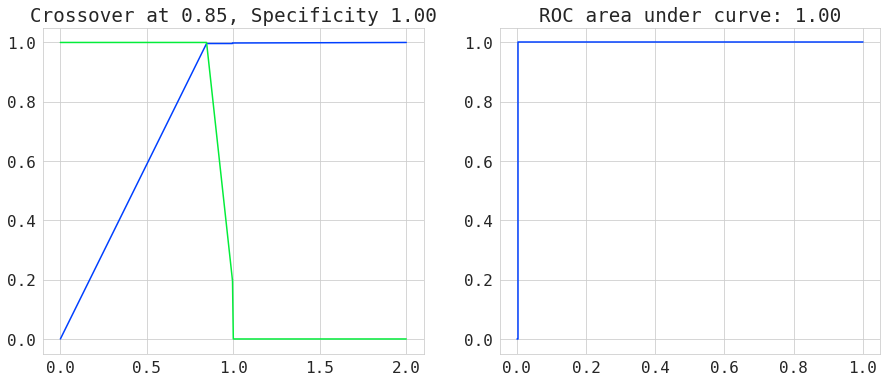



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       565
         1.0       0.71      1.00      0.83         5

    accuracy                           1.00       570
   macro avg       0.86      1.00      0.92       570
weighted avg       1.00      1.00      1.00       570



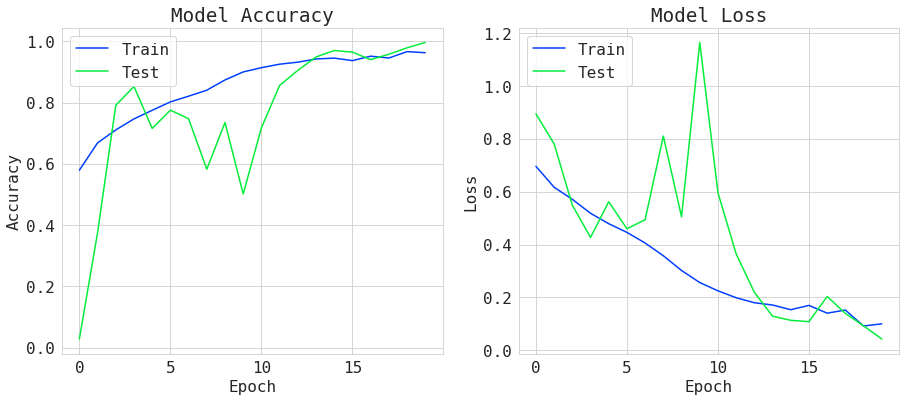

In [53]:
res_m2 = computer.compute(X=X_test, y=y_test, model=m2, hist=h2, preds=True, 
               summary=False, report=True, fusion=True, 
               classes=['No Planet','Planet'],roc=True)

In [54]:
# We can retrieve a given metric from the computer's compute function 
# by accessing any of the given keys from the RES dictionary

# res_m2.keys()

# ['model']
# ['preds']
# ['summary']()
# ['FM'][0]
# ['FM'][1]
# ['ROC']
#print(res_m2['report'])
# ['jaccard']
 #res_m2['fowlkes']
# ['accuracy']
# ['recall']
# ['HIST']

In [73]:
res_m2['fowlkes']

0.9964289212759287

# `MODEL 3`

## Build M3

In [56]:
#### MODEL 3
# increase learning rate to 4e-3

m3 = K.build_cnn(X_train, X_test, y_train, y_test, kernel_size=11, 
                     activation='relu', input_shape=X_train.shape[1:], 
                     strides=4, optimizer=Adam, learning_rate=4e-3, 
                     loss='binary_crossentropy', metrics=['accuracy'])

BUILDING MODEL...
LAYER 1
LAYER 2
LAYER 3
LAYER 4
FULL CONNECTION
ADDING COST FUNCTION
COMPILED


## Train M3

In [57]:
# keep number of epochs at 20

h3 = K.fit_cnn(X_train,y_train, X_test, y_test, m3,
               validation_data=(X_test, y_test), verbose=2, epochs=20, 
               steps_per_epoch=(X_train.shape[1]//32), batch_size=32)

FITTING MODEL...
Epoch 1/20
 - 16s - loss: 0.6168 - accuracy: 0.6840 - val_loss: 0.4940 - val_accuracy: 0.7895
Epoch 2/20
 - 17s - loss: 0.4595 - accuracy: 0.7945 - val_loss: 0.6731 - val_accuracy: 0.5368
Epoch 3/20
 - 18s - loss: 0.4137 - accuracy: 0.8144 - val_loss: 1.5706 - val_accuracy: 0.2702
Epoch 4/20
 - 17s - loss: 0.3486 - accuracy: 0.8554 - val_loss: 1.8025 - val_accuracy: 0.3474
Epoch 5/20
 - 17s - loss: 0.2353 - accuracy: 0.9122 - val_loss: 0.9206 - val_accuracy: 0.6632
Epoch 6/20
 - 17s - loss: 0.3182 - accuracy: 0.8756 - val_loss: 0.1347 - val_accuracy: 0.9579
Epoch 7/20
 - 17s - loss: 0.2137 - accuracy: 0.9160 - val_loss: 0.1280 - val_accuracy: 0.9860
Epoch 8/20
 - 17s - loss: 0.1443 - accuracy: 0.9467 - val_loss: 0.0610 - val_accuracy: 0.9842
Epoch 9/20
 - 17s - loss: 0.0959 - accuracy: 0.9662 - val_loss: 0.0407 - val_accuracy: 0.9965
Epoch 10/20
 - 16s - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.0475 - val_accuracy: 0.9912
Epoch 11/20
 - 16s - loss: 0.0806 - accura

## Evaluate M3

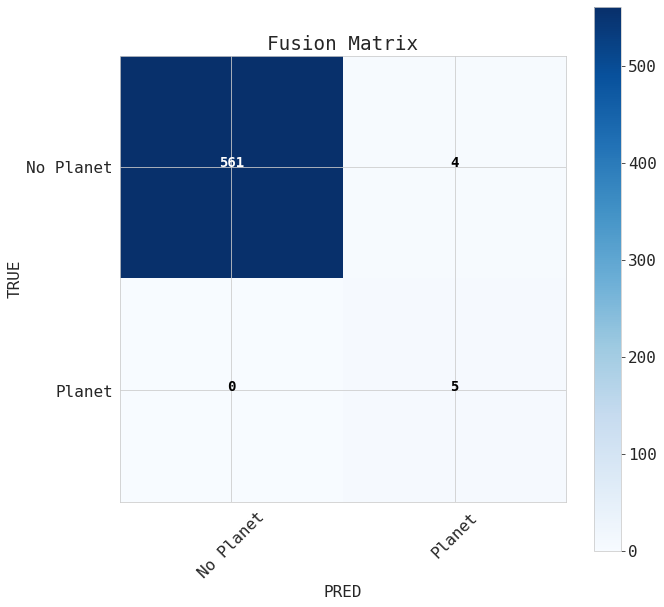

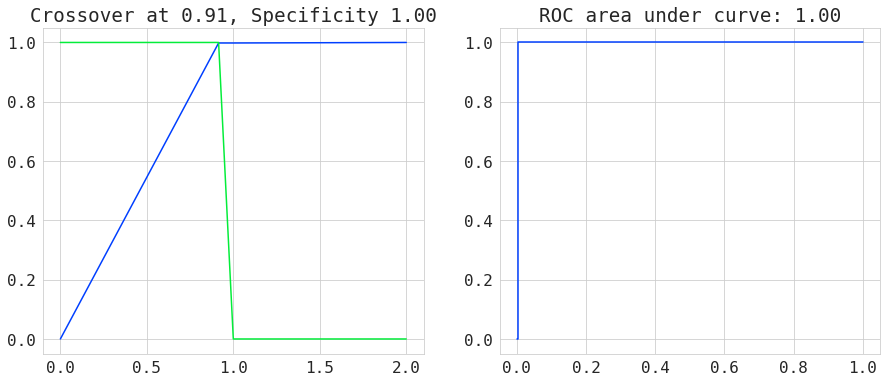



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       565
         1.0       0.56      1.00      0.71         5

    accuracy                           0.99       570
   macro avg       0.78      1.00      0.86       570
weighted avg       1.00      0.99      0.99       570



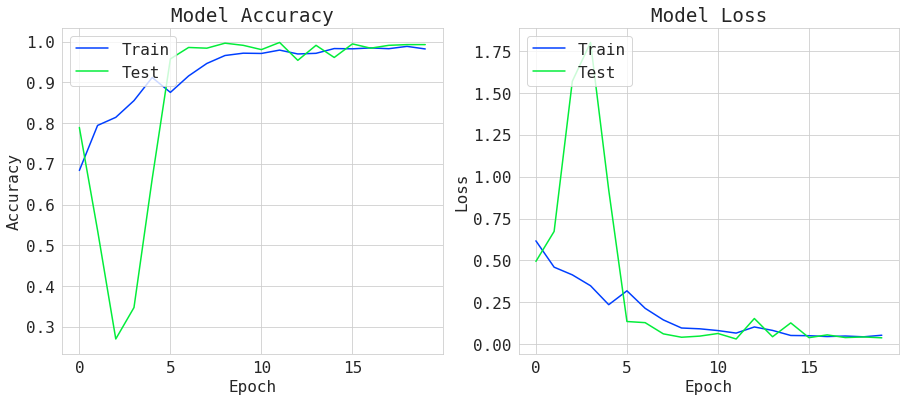

In [58]:
res_m3 = computer.compute(X=X_test, y=y_test, model=m3, hist=h3, preds=True, 
               summary=False, report=True, fusion=True, 
               classes=['No Planet','Planet'],roc=True)

It appears that increasing the learning rate did not help to improve the model's performance. While it still identified all 5 planets, it misclassified 4 non-planets as planets, two more than model 2. Let's see if we can decrease the False Positive Rate, while Maintaining the False Negative Rate at zero. We'll go back to Model 2's original learning rate of 3e-4, this time increasing the number of epochs instead.

# `MODEL 4`

## Build M4

In [59]:
#### MODEL 4
# decrease learning rate back to 3e-4

m4 = K.build_cnn(X_train, X_test, y_train, y_test, kernel_size=11, 
                     activation='relu', input_shape=X_train.shape[1:], 
                     strides=4, optimizer=Adam, learning_rate=3e-4, 
                     loss='binary_crossentropy', metrics=['accuracy'])

BUILDING MODEL...
LAYER 1
LAYER 2
LAYER 3
LAYER 4
FULL CONNECTION
ADDING COST FUNCTION
COMPILED


## Fit M4

In [60]:
# increase number of epochs to 33

h4 = K.fit_cnn(X_train,y_train, X_test, y_test, m4,
               validation_data=(X_test, y_test), verbose=2, epochs=33, 
               steps_per_epoch=(X_train.shape[1]//32), batch_size=32)

FITTING MODEL...
Epoch 1/33
 - 17s - loss: 0.7066 - accuracy: 0.5758 - val_loss: 0.6493 - val_accuracy: 0.7035
Epoch 2/33
 - 18s - loss: 0.6380 - accuracy: 0.6417 - val_loss: 0.5416 - val_accuracy: 0.8491
Epoch 3/33
 - 19s - loss: 0.5928 - accuracy: 0.6869 - val_loss: 0.4485 - val_accuracy: 0.8561
Epoch 4/33
 - 18s - loss: 0.5355 - accuracy: 0.7326 - val_loss: 0.4015 - val_accuracy: 0.8263
Epoch 5/33
 - 18s - loss: 0.4855 - accuracy: 0.7607 - val_loss: 0.4423 - val_accuracy: 0.7912
Epoch 6/33
 - 18s - loss: 0.4230 - accuracy: 0.8059 - val_loss: 0.3697 - val_accuracy: 0.8175
Epoch 7/33
 - 17s - loss: 0.3168 - accuracy: 0.8636 - val_loss: 0.3396 - val_accuracy: 0.8386
Epoch 8/33
 - 17s - loss: 0.2921 - accuracy: 0.8804 - val_loss: 0.1984 - val_accuracy: 0.8825
Epoch 9/33
 - 17s - loss: 0.2371 - accuracy: 0.9006 - val_loss: 0.1593 - val_accuracy: 0.9298
Epoch 10/33
 - 18s - loss: 0.2315 - accuracy: 0.9110 - val_loss: 0.2077 - val_accuracy: 0.9035
Epoch 11/33
 - 17s - loss: 0.1909 - accura

## Evaluate M4

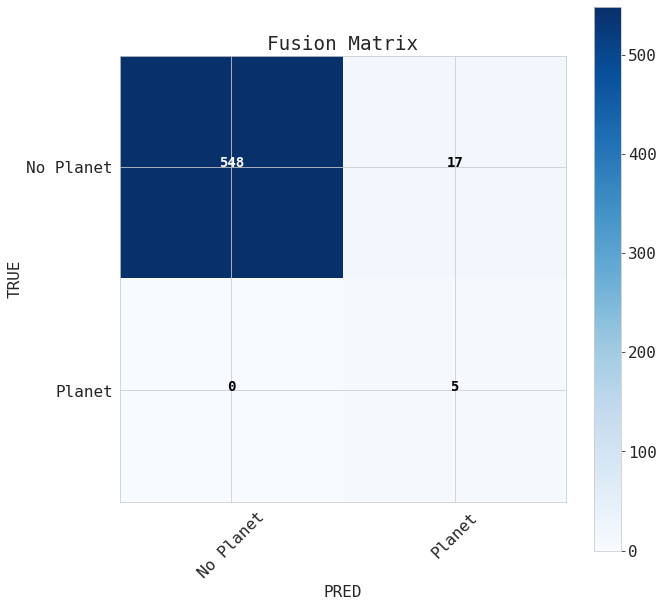

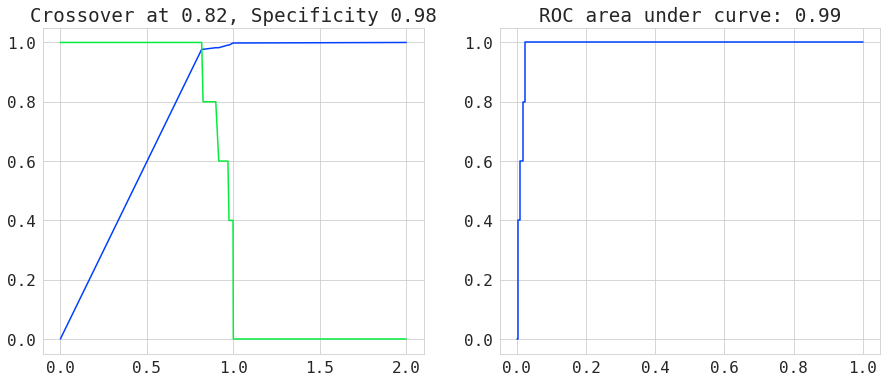



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       565
         1.0       0.23      1.00      0.37         5

    accuracy                           0.97       570
   macro avg       0.61      0.98      0.68       570
weighted avg       0.99      0.97      0.98       570



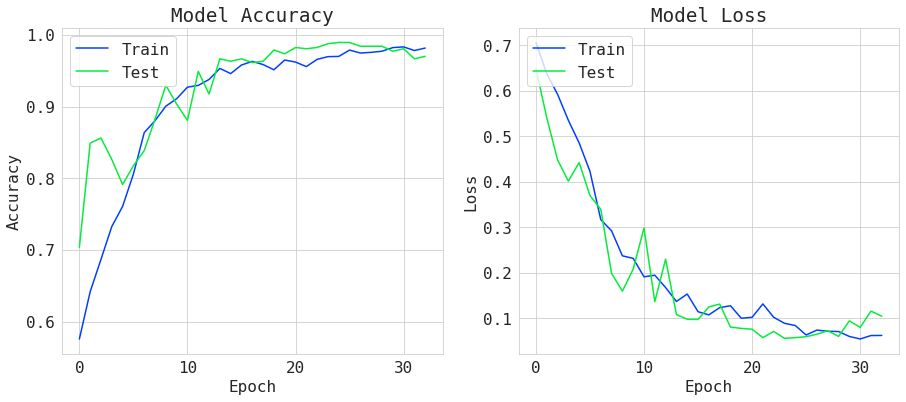

In [62]:
res_m4 = computer.compute(X=X_test, y=y_test, model=m4, hist=h4, preds=True, 
               summary=False, report=True, fusion=True, 
               classes=['No Planet','Planet'],roc=True)

In [67]:
# %mkdir models
m2.save_weights('models/k2_cnn1d.h5')

# Interpret Results

## Conclusion

Above, we were able to identify with 99% accuracy 5 of 5 stars with an orbiting exoplanet (or exoplanets). The best model (MODEL 2) incorrectly predicted just 2 False Positives, with ZERO false negatives. 

# Recommendations

While it is possible to create a near-perfect classification model for detecting exoplanets using the raw flux values of an imbalanced data set, the model would benefit from further validation using additional data from either K2 or another telescope such as TESS. One issue with this model is that it doesn't reveal how it makes the decision on each prediction, an insight that would be extremely useful for astrophysicists and for developing and improving the model itself. A better, more robust and useful model, therefore, would be one which gives such insight without sacrificing accuracy or recall. 

My recommendations are the following:

   1. Use datasets from the MAST website (via API) to incorporate other calculations of the star's properties as features to be used for classification algorithms. Furthermore, attempt other types of transformations and normalizations on the data before running the model - for instance, apply Fourier transform and phase folding.

   2. Combine data from multiple campaigns and perhaps even multiple telescopes (for instance, matching sky coordinates and time intervals between K2, Kepler, and TESS for a batch of stars that have overlapping observations - this would be critical for finding transit periods that are longer than the campaigns of a single telecope's observation period).

   3. Explore using computer vision on not only the Full Frame images we can collect from telescopes like TESS, but also on spectographs of the flux values themselves. The beauty of machine learning is our ability to rely on the computer to pick up very small nuances in differences that we ourselves cannot see with our own eyes. 
   
   4. Explore using autoencoded machine learning algorithms with Restricted Boltzmann Machines - this type of model has proven to be incredibly effective in the image analysis of handwriting as we've seen applied the MNIST dataset - let's find out if the same is true for images of stars, be they the Full Frame Images or spectographs.

# Future Work

To continue this project, I'll take another approach for detecting exoplanets using computer vision to analyze images of spectographs of this same star flux data set. In part II (notebook `[starskøpe-2]`) I use Restricted Boltzmann Machines on Fourier-transformed spectograph images of the Flux data for K2. These are then stacked on top of each other as layers in a Deep Boltzmann Machine neural network. In part III (notebook `[starskøpe-3]`) I will apply a similar technique using data from TESS.

For triage/vetting purposes, this model could be useful for scientists. However, I would like to extend the model's capability using a multiclassification algorithm that can tell us not only if there is a transiting body, but how many, as well as additional information about the star's properties. The latter could be done by training another model on stellar parameters, and then stacking the two together into one neural network.